<a href="https://colab.research.google.com/github/salahudeentope/British-NHS-Prescription-Drugs-Analysis-/blob/master/Captone_project_Team_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the fastai platform on Google Drive


In [41]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Mount the Google Drive on Colab

In [42]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


Convert all the .jfif files to jpeg to ensure consistency


In [0]:
# !sudo apt install imagemagick
# !cd '/content/gdrive/My Drive/fastai-v3/wheat_rust/test/'; mogrify -format jpg *.jfif
# !cd '/content/gdrive/My Drive/fastai-v3/wheat_rust/train/healthy_wheat'; mogrify -format jpg *.jfif  
# !cd '/content/gdrive/My Drive/fastai-v3/wheat_rust/train/leaf_rust'; mogrify -format jpg *.jfif  
# !cd '/content/gdrive/My Drive/fastai-v3/wheat_rust/train/stem_rust'; mogrify -format jpg *.jfif  

Import the required libraries

In [0]:
from fastai.vision import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Define the path on Google Drive


In [45]:
path = Path(base_dir + 'wheat_rust/')
path.ls()



[PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission1.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission2.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission3.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission4.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission5.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission6.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission7.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission8.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submiss

Create the ImageDataBunch from the folders on Google Drive

In [46]:
np.random.seed(42)

data = ImageDataBunch.from_folder( path/'train', train='.', test='../test'
               , valid_pct=0.2, bs=64, size=64, ds_tfms=get_transforms())
data.classes

['healthy_wheat', 'leaf_rust', 'stem_rust']

View random sample of the images

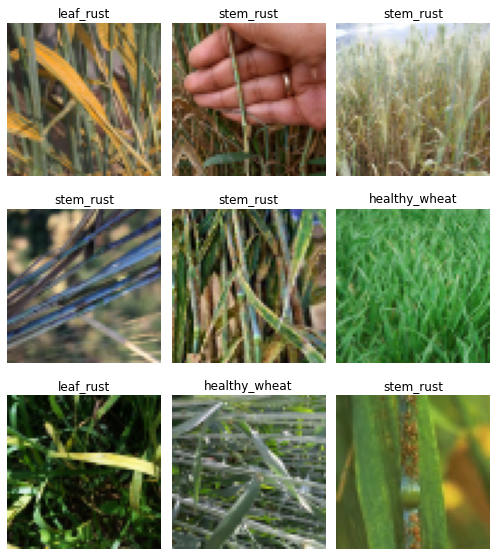

In [47]:
data.show_batch(rows=3, figsize=(7,8))

Build the Learner

In [0]:
w = torch.cuda.FloatTensor([1.0, 0.9, 1.1])
learn = cnn_learner(data, models.resnet50, metrics = error_rate, loss_func=torch.nn.CrossEntropyLoss(weight=w))


Fit the top layer of the model

In [49]:
learn.fit_one_cycle(25, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.911339,1.431511,0.451429,00:06
1,1.713694,1.702624,0.394286,00:06
2,1.615231,2.173586,0.417143,00:06
3,1.459998,1.352219,0.348571,00:06
4,1.293172,1.047711,0.331429,00:06
5,1.177132,0.909050,0.331429,00:06
6,1.071747,0.806628,0.257143,00:06
7,0.951880,0.854989,0.297143,00:06
8,0.902819,0.797034,0.285714,00:06
9,0.831734,0.810538,0.262857,00:06


Save the stage-1 of the model

In [0]:
learn.save('stage-1-64')

Unfreeze the transfer learning model so better results can be obtained


In [0]:
learn.unfreeze()

Finding the optimum learning rate

In [52]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Determine the best from the plot

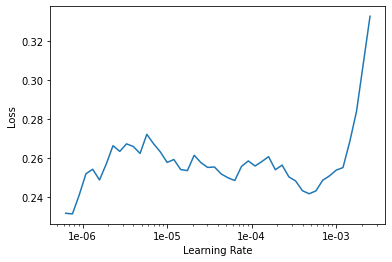

In [53]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

Re-fitting the model for deeper layers

In [54]:
learn.fit_one_cycle(25, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.221473,0.588176,0.205714,00:06
1,0.252592,0.578938,0.200000,00:06
2,0.264084,0.604601,0.205714,00:06
3,0.270282,0.596538,0.211429,00:06
4,0.258768,0.593757,0.211429,00:06
5,0.260130,0.578747,0.188571,00:06
6,0.254513,0.567347,0.205714,00:06
7,0.253108,0.580532,0.217143,00:06
8,0.243943,0.581417,0.205714,00:06
9,0.238383,0.591091,0.200000,00:06


In [0]:
learn.save('stage-2-64')

Load the new saved model

In [0]:
#learn.load('stage-2-64');

Interpreting the model

In [0]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()


In [57]:
np.random.seed(42)

data = ImageDataBunch.from_folder( path/'train', train='.', test='../test'
               , valid_pct=0.2, bs=64, size=128, ds_tfms=get_transforms())

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

In [58]:
learn.freeze()
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


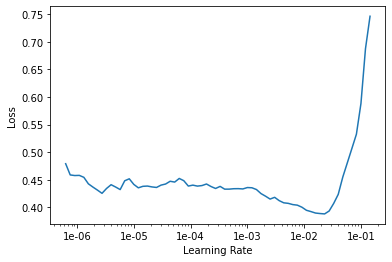

In [59]:
learn.recorder.plot()

In [0]:
lr=1e-5/2


In [61]:
learn.fit_one_cycle(25, slice(lr))


epoch,train_loss,valid_loss,error_rate,time
0,0.394544,0.511811,0.188571,00:08
1,0.401132,0.531836,0.171429,00:08
2,0.405442,0.544322,0.171429,00:08
3,0.413020,0.543410,0.171429,00:08
4,0.423156,0.550915,0.171429,00:08
5,0.432630,0.558626,0.165714,00:08
6,0.422560,0.556650,0.171429,00:08
7,0.434981,0.564144,0.194286,00:08
8,0.438416,0.549185,0.177143,00:08
9,0.438040,0.551898,0.171429,00:08


In [0]:
learn.save('stage-1-128-rn50')


In [0]:
learn.unfreeze()


In [64]:
learn.fit_one_cycle(25, slice(1e-5, lr/5))


epoch,train_loss,valid_loss,error_rate,time
0,0.456713,0.546291,0.182857,00:09
1,0.431538,0.554957,0.188571,00:09
2,0.412080,0.546644,0.165714,00:09
3,0.410726,0.541632,0.177143,00:09
4,0.409961,0.534039,0.160000,00:09
5,0.400034,0.524873,0.177143,00:09
6,0.382247,0.520727,0.177143,00:09
7,0.369260,0.511233,0.165714,00:09
8,0.361929,0.513835,0.165714,00:09
9,0.349035,0.515157,0.165714,00:09


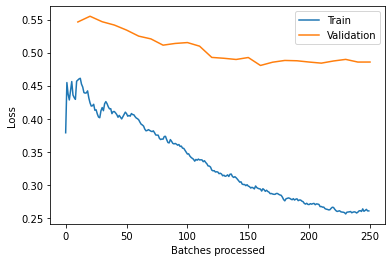

In [65]:
learn.recorder.plot_losses()


In [0]:
learn.save('stage-2-128-rn50')


build a third model with size increased


In [67]:
np.random.seed(42)

data = ImageDataBunch.from_folder( path/'train', train='.', test='../test'
               , valid_pct=0.2, bs=64, size=256, ds_tfms=get_transforms())

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [68]:
learn.freeze()
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


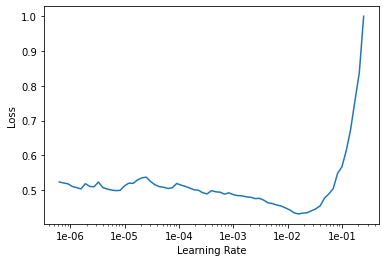

In [69]:
learn.recorder.plot()

In [70]:
lr=1e-5/2
learn.fit_one_cycle(25, slice(lr))


epoch,train_loss,valid_loss,error_rate,time
0,0.577566,0.482375,0.177143,00:12
1,0.532465,0.500724,0.165714,00:12
2,0.528418,0.516899,0.182857,00:12
3,0.538193,0.515997,0.177143,00:13
4,0.540104,0.520256,0.182857,00:12
5,0.553021,0.513631,0.182857,00:12
6,0.555675,0.525953,0.188571,00:12
7,0.550892,0.516917,0.182857,00:12
8,0.553258,0.507155,0.177143,00:12
9,0.548012,0.514630,0.171429,00:12


In [0]:
learn.save('stage-1-256-rn50')
learn.unfreeze()


In [72]:
learn.fit_one_cycle(25, slice(1e-5, lr/5))


epoch,train_loss,valid_loss,error_rate,time
0,0.579658,0.512859,0.171429,00:13
1,0.564349,0.504289,0.182857,00:13
2,0.550612,0.502504,0.182857,00:12
3,0.524774,0.496279,0.182857,00:13
4,0.508942,0.482012,0.182857,00:13
5,0.505216,0.470173,0.165714,00:13
6,0.470770,0.457612,0.177143,00:13
7,0.447534,0.454115,0.171429,00:13
8,0.431979,0.447944,0.165714,00:12
9,0.412480,0.443627,0.154286,00:13


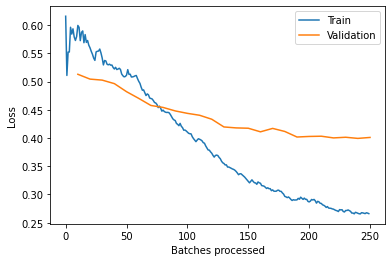

In [73]:
learn.recorder.plot_losses()


In [0]:
learn.save('stage-2-256-rn50')


In [75]:
learn.load('stage-2-256-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,leaf_rust
Path: /content/gdrive/My Drive/fastai-v3/wheat_rust/train;

Valid: LabelList (175 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
stem_rust,stem_rust,healthy_wheat,stem_rust,leaf_rust
Path: /content/gdrive/My Drive/fastai-v3/wheat_rust/train;

Test: LabelList (620 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/wheat_rust/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

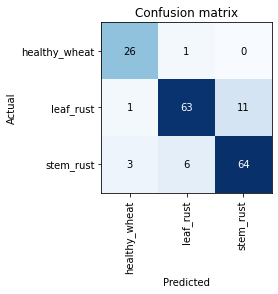

In [76]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [77]:
learn.load('stage-2-128-rn50')


Learner(data=ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,leaf_rust
Path: /content/gdrive/My Drive/fastai-v3/wheat_rust/train;

Valid: LabelList (175 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
stem_rust,stem_rust,healthy_wheat,stem_rust,leaf_rust
Path: /content/gdrive/My Drive/fastai-v3/wheat_rust/train;

Test: LabelList (620 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/wheat_rust/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

Making predictions on the test dataset

In [78]:
learn.export()
preds, y = learn.get_preds(ds_type=DatasetType.Test)



Save Predictions

In [79]:
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('/content/gdrive/My Drive/fastai-v3/wheat_rust/test/')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learn.data.classes):
  submission[c] = preds[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()


,ID,leaf_rust,stem_rust,healthy_wheat
0,1NCGYL,0.298473,0.699707,0.001820
1,0JIX2C,0.888150,0.105231,0.006620
2,008FWT,0.515390,0.449989,0.034620
3,26MSDN,0.983851,0.012613,0.003535
4,00AQXY,0.188579,0.810102,0.001319


In [80]:
print(len(submission))
submission.to_csv('/content/gdrive/My Drive/fastai-v3/wheat_rust/starter_nb_submission12.csv', index=False)

620
